<a href="https://colab.research.google.com/github/majiddaeinejad/quera-ai-bootcamp-divar/blob/statistical_analysis/Question_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Setup cell

In [68]:
!pip install arabic-reshaper python-bidi jdatetime utm --quiet

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import arabic_reshaper
from bidi.algorithm import get_display
import jdatetime

import geopandas as gpd
from shapely.geometry import Polygon
import folium
from branca.colormap import StepColormap


rcParams['font.family'] = 'DejaVu Sans'

def fa_label(text):
    return get_display(arabic_reshaper.reshape(text))

Load data

In [69]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)


file_path = '/content/drive/MyDrive/Colab Notebooks/Divar.csv'


df = pd.read_csv(file_path , encoding='utf-8')

Mounted at /content/drive


/tmp/ipython-input-1578516001.py:9: DtypeWarning: Columns (11,27,29,53) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path , encoding='utf-8')


	در طول زمان قیمت‌های اسمی افزایش پیدا می‌کنند اما این افزایش لزوما به معنی بالارفتن ارزش واقعی ملک نیست و می‌تواند ناشی از تورم باشد. به ازای میانگین مبلغ قیمت(price_value) در سال‌های ۱۴۰۰ تا ۱۴۰۳ قیمت حقیقی را محاسبه کنید و بررسی کنید ترند قیمت حقیقی چگونه است.

In [70]:
df['created_at_month'].head(10)


,created_at_month
0,2024-08-01 00:00:00
1,2024-05-01 00:00:00
2,2024-10-01 00:00:00
3,2024-06-01 00:00:00
4,2024-05-01 00:00:00
5,2024-09-01 00:00:00
6,2024-11-01 00:00:00
7,2024-09-01 00:00:00
8,2024-06-01 00:00:00
9,2024-10-01 00:00:00


In [71]:
df['created_at_month'] = pd.to_datetime(df['created_at_month'])


In [72]:
def to_shamsi_year(dt):
    if pd.isnull(dt):
        return None
    shamsi_date = jdatetime.date.fromgregorian(date=dt.date())
    return shamsi_date.year

df['year_shamsi'] = df['created_at_month'].apply(to_shamsi_year)


In [73]:
df[['created_at_month', 'year_shamsi']].head(10)


,created_at_month,year_shamsi
0,2024-08-01,1403
1,2024-05-01,1403
2,2024-10-01,1403
3,2024-06-01,1403
4,2024-05-01,1403
5,2024-09-01,1403
6,2024-11-01,1403
7,2024-09-01,1403
8,2024-06-01,1403
9,2024-10-01,1403


In [74]:
df['year_shamsi'].unique()


array([1403, 1402, 1401, 1400, 1399, 1398])

In [75]:
df['year_shamsi'].value_counts().sort_index()


,count
year_shamsi,
1398,1
1399,2
1400,9
1401,120
1402,5664
1403,994204


In [76]:
df_1400_1403 = df[df['year_shamsi'].between(1400, 1403)]


In [77]:
zero_count = (df_1400_1403['price_value'] == 0).sum()


nan_count = df_1400_1403['price_value'].isna().sum()

print(f"0 :{zero_count}")
print(f"NaN: {nan_count}")


0 :1902
NaN: 431652


In [78]:
df.groupby('year_shamsi')['price_value'].describe()


,count,mean,std,min,25%,50%,75%,max
year_shamsi,,,,,,,,
1398,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1399,1.0,2.750000e+10,NaN,2.750000e+10,2.750000e+10,2.750000e+10,2.750000e+10,2.750000e+10
1400,3.0,1.066667e+09,2.309401e+08,8.000000e+08,1.000000e+09,1.200000e+09,1.200000e+09,1.200000e+09
1401,48.0,1.882049e+10,4.302349e+10,0.000000e+00,1.775000e+09,2.325000e+09,5.725000e+09,2.273700e+11
1402,4095.0,7.918916e+09,2.736729e+10,0.000000e+00,1.327500e+09,2.750000e+09,6.196000e+09,7.150000e+11
1403,564199.0,1.743388e+10,5.900252e+11,0.000000e+00,1.400000e+09,2.850000e+09,5.900000e+09,1.000000e+14


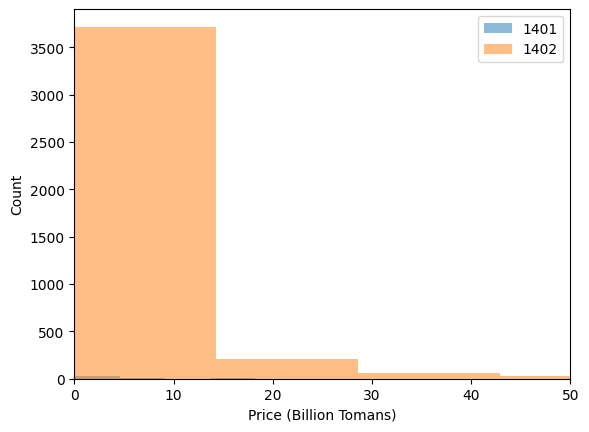

In [79]:
plt.hist(df[df['year_shamsi'] == 1401]['price_value'] / 1e9, bins=50, alpha=0.5, label='1401')
plt.hist(df[df['year_shamsi'] == 1402]['price_value'] / 1e9, bins=50, alpha=0.5, label='1402')
plt.xlim(0, 50)
plt.xlabel('Price (Billion Tomans)')
plt.ylabel('Count')
plt.legend()
plt.show()



In [80]:

df_1400_1403 = df_1400_1403.dropna(subset=['price_value'])
df_1400_1403 = df_1400_1403[df_1400_1403['price_value'] != 0]


In [81]:
zero_count = (df_1400_1403['price_value'] == 0).sum()


nan_count = df_1400_1403['price_value'].isna().sum()

print(f"0 :{zero_count}")
print(f"NaN: {nan_count}")

0 :0
NaN: 0


In [82]:
df = df_1400_1403.copy()


mean_nom = df.groupby('year_shamsi')['price_value'].mean().sort_index()
median_nom = df.groupby('year_shamsi')['price_value'].median().sort_index()
count_per_year = df.groupby('year_shamsi')['price_value'].count().sort_index()

In [83]:

cpi = {1400:100.0, 1401:151.0, 1402:212.46, 1403:300.55}
cpi_s = pd.Series(cpi).reindex(mean_nom.index)


In [84]:
# قیمت حقیقی (پایه 1400)
mean_real = mean_nom * (cpi_s.loc[1400] / cpi_s)
median_real = median_nom * (cpi_s.loc[1400] / cpi_s)

In [85]:
growth_nom_pct = mean_nom.pct_change() * 100
growth_real_pct = mean_real.pct_change() * 100

In [86]:
summary = pd.DataFrame({
    'n': count_per_year,
    'mean_nominal': mean_nom,
    'median_nominal': median_nom,
    'mean_real_base1400': mean_real,
    'median_real_base1400': median_real,
    'cpi': cpi_s,
    'growth_nom_pct': growth_nom_pct,
    'growth_real_pct': growth_real_pct
}).round(0)
summary

,n,mean_nominal,median_nominal,mean_real_base1400,median_real_base1400,cpi,growth_nom_pct,growth_real_pct
year_shamsi,,,,,,,,
1400,3,1.066667e+09,1.200000e+09,1.066667e+09,1.200000e+09,100.0,NaN,NaN
1401,47,1.922092e+10,2.400000e+09,1.272909e+10,1.589404e+09,151.0,1702.0,1093.0
1402,4090,7.928597e+09,2.750000e+09,3.731807e+09,1.294361e+09,212.0,-59.0,-71.0
1403,562303,1.749266e+10,2.850000e+09,5.820217e+09,9.482615e+08,301.0,121.0,56.0


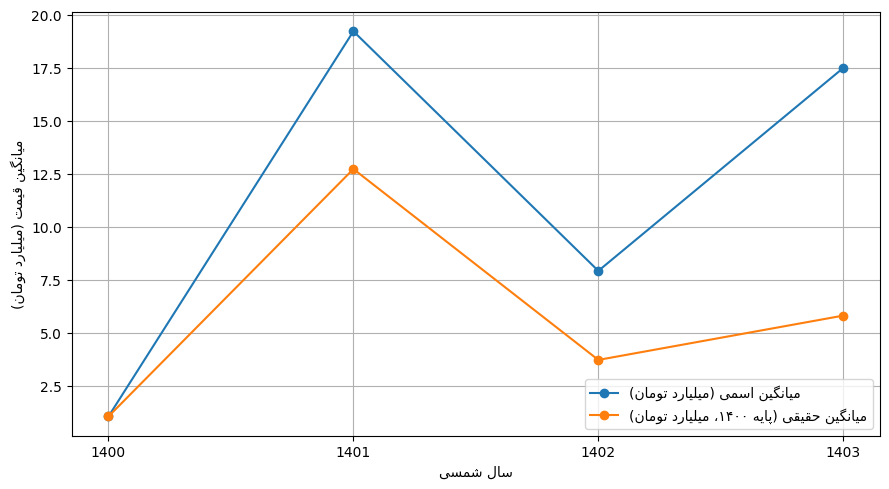

In [87]:
def to_billion(x): return x/1e9
plt.figure(figsize=(9,5))
plt.plot(mean_nom.index, mean_nom.map(to_billion), '-o', label=fa_label('میانگین اسمی (میلیارد تومان)'))
plt.plot(mean_real.index, mean_real.map(to_billion), '-o', label=fa_label('میانگین حقیقی (پایه ۱۴۰۰، میلیارد تومان)'))
plt.xlabel(fa_label('سال شمسی'))
plt.ylabel(fa_label('میانگین قیمت (میلیارد تومان)'))
plt.xticks(mean_nom.index, [fa_label(str(y)) for y in mean_nom.index])
plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()




CPI معیاری رسمی برای اندازه‌گیری سطح عمومی قیمت‌ها و نرخ تورم در اقتصاد است.
 مقایسهٔ مستقیم قیمت‌های اسمی در سال‌های مختلف می‌تواند گمراه‌کننده باشد،
 زیرا بخشی از افزایش مشاهده‌شده صرفاً ناشی از (تورم) است، نه رشد واقعی ارزش کالا یا دارایی.

تعدیل قیمت‌های اسمی با استفاده از CPI امکان محاسبهٔ قیمت‌های حقیقی را فراهم می‌کند؛
 یعنی قیمت‌هایی که اثر تورم در آن‌ها حذف شده و بر اساس قدرت خرید سال پایه بیان شده‌اند.
این امر باعث می‌شود تغییرات حاصل، منعکس‌کنندهٔ رشد واقعی ارزش ملک باشد
و داده‌ها قابلیت مقایسهٔ بین‌زمانی پیدا کنند.

قیمت حقیقی سال t = قیمت اسمی سال t × (CPI سال پایه / CPI سال t)
